In [3]:
# MSCC Classifications
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
%matplotlib inline

In [4]:
# FTICR-MS DATA FILE
FT_data_1 = pd.read_excel("WC_EXT_Summary.xlsx")
FT_data_1.columns

Index(['Mass', 'C', 'H', 'O', 'N', 'C13', 'S', 'P', 'Na', 'El_comp', 'Class',
       'NeutralMass', 'Error_ppm', 'Candidates', 'WC_EXT_1_t0_L_r1',
       'WC_EXT_1_t0_L_r2', 'WC_EXT_1_t0_M_r1', 'WC_EXT_1_t0_M_r2',
       'WC_EXT_1_t0_S_r1', 'WC_EXT_1_t0_S_r2', 'WC_EXT_2_t0_L_r1',
       'WC_EXT_2_t0_L_r2', 'WC_EXT_2_t0_M_r1', 'WC_EXT_2_t0_M_r2',
       'WC_EXT_2_t0_S_r1', 'WC_EXT_2_t0_S_r2', 'WC_EXT_3_t0_L_r1',
       'WC_EXT_3_t0_L_r2', 'WC_EXT_3_t0_M_r1', 'WC_EXT_3_t0_M_r2',
       'WC_EXT_3_t0_S_r1', 'WC_EXT_3_t0_S_r2', 'kmd', 'mf', 'dbe', 'nosp',
       'nosc', 'gibbs', 'ai', 'ai_mod', 'z-class', 'cho-ind', 'class'],
      dtype='object')

In [5]:
FT_data_1 = FT_data_1.drop(['C13', 'Na', 'El_comp', 'NeutralMass','Error_ppm', 'Candidates', 'kmd', 'mf', 'dbe', 'nosp',
       'nosc', 'gibbs', 'ai', 'ai_mod', 'z-class', 'cho-ind', 'class'], axis = 1)
FT_data_1.rename(columns = {'Class' : 'vK_Class'})

Mass   C    H   O  N  S  P    vK_Class  WC_EXT_1_t0_L_r1  \
0      109.029510   6    6   2  0  0  0      Lignin               0.0   
1      111.008776   5    4   3  0  0  0      Lignin               0.0   
2      111.045162   6    8   2  0  0  0      Lignin               0.0   
3      111.081525   7   12   1  0  0  0       Lipid               0.0   
4      112.004042   4    3   3  1  0  0       ConHC               0.0   
...           ...  ..  ...  .. .. .. ..         ...               ...   
80223  989.930600  62  123   6  1  0  0       Lipid               0.0   
80224  994.209124  36   54  25  1  2  1  AminoSugar               0.0   
80225  994.212610  44   53  17  1  4  0      Lignin               0.0   
80226  994.264734  36   57  25  3  2  0  AminoSugar               0.0   
80227  994.935871  66  125   2  1  1  0       Lipid               0.0   

       WC_EXT_1_t0_L_r2  ...  WC_EXT_2_t0_M_r1  WC_EXT_2_t0_M_r2  \
0                   0.0  ...               0.0               0.0   
1                   0.0  ...               0.0               0.0   
2                   0.0  ...               0.0               0.0   
3                   0.0  ...               0.0               0.0   
4                   0.0  ...               0.0               0.0   
...                 ...  ...               ...               ...   
80223               0.0  ...               0.0               0.0   
80224               0.0  ...               0.0               0.0   
80225               0.0  ...               0.0               0.0   
80226               0.0  ...               0.0               0.0   
80227               0.0  ...               0.0               0.0   

       WC_EXT_2_t0_S_r1  WC_EXT_2_t0_S_r2  WC_EXT_3_t0_L_r1  WC_EXT_3_t0_L_r2  \
0                   0.0               0.0               0.0               0.0   
1                   0.0         2284279.8               0.0               0.0   
2                   0.0               0.0               0.0               0.0   
3                   0.0               0.0         2317839.0               0.0   
4                   0.0               0.0               0.0               0.0   
...                 ...               ...               ...               ...   
80223               0.0               0.0               0.0               0.0   
80224               0.0               0.0               0.0               0.0   
80225               0.0               0.0               0.0               0.0   
80226               0.0               0.0               0.0               0.0   
80227               0.0               0.0               0.0               0.0   

       WC_EXT_3_t0_M_r1  WC_EXT_3_t0_M_r2  WC_EXT_3_t0_S_r1  WC_EXT_3_t0_S_r2  
0                     0               0.0               0.0               0.0  
1                     0               0.0               0.0               0.0  
2                     0               0.0               0.0               0.0  
3                     0               0.0               0.0               0.0  
4                     0               0.0               0.0               0.0  
...                 ...               ...               ...               ...  
80223                 0               0.0               0.0               0.0  
80224                 0               0.0               0.0               0.0  
80225                 0               0.0         5080083.0         5657198.5  
80226                 0               0.0         5882900.0         6197870.0  
80227                 0               0.0               0.0               0.0  

[80228 rows x 26 columns]

In [27]:
# Compute MSCC Element Ratios
FT_data_1['OtoC_ratio'] = FT_data_1.O / FT_data_1.C
FT_data_1['HtoC_ratio'] = FT_data_1.H / FT_data_1.C
FT_data_1['NtoC_ratio'] = FT_data_1.N / FT_data_1.C
FT_data_1['PtoC_ratio'] = FT_data_1.P / FT_data_1.C
FT_data_1['NtoP_ratio'] = FT_data_1.N / FT_data_1.P
FT_data_1

Mass   C    H   O  N  S  P       Class  WC_EXT_1_t0_L_r1  \
0      109.029510   6    6   2  0  0  0      Lignin               0.0   
1      111.008776   5    4   3  0  0  0      Lignin               0.0   
2      111.045162   6    8   2  0  0  0      Lignin               0.0   
3      111.081525   7   12   1  0  0  0       Lipid               0.0   
4      112.004042   4    3   3  1  0  0       ConHC               0.0   
...           ...  ..  ...  .. .. .. ..         ...               ...   
80223  989.930600  62  123   6  1  0  0       Lipid               0.0   
80224  994.209124  36   54  25  1  2  1  AminoSugar               0.0   
80225  994.212610  44   53  17  1  4  0      Lignin               0.0   
80226  994.264734  36   57  25  3  2  0  AminoSugar               0.0   
80227  994.935871  66  125   2  1  1  0       Lipid               0.0   

       WC_EXT_1_t0_L_r2  ...  WC_EXT_3_t0_M_r2  WC_EXT_3_t0_S_r1  \
0                   0.0  ...               0.0               0.0   
1                   0.0  ...               0.0               0.0   
2                   0.0  ...               0.0               0.0   
3                   0.0  ...               0.0               0.0   
4                   0.0  ...               0.0               0.0   
...                 ...  ...               ...               ...   
80223               0.0  ...               0.0               0.0   
80224               0.0  ...               0.0               0.0   
80225               0.0  ...               0.0         5080083.0   
80226               0.0  ...               0.0         5882900.0   
80227               0.0  ...               0.0               0.0   

       WC_EXT_3_t0_S_r2  OtoC_ratio  HtoC_ratio  NtoC_ratio  PoC_ratio  \
0                   0.0    0.333333    1.000000    0.000000   0.000000   
1                   0.0    0.600000    0.800000    0.000000   0.000000   
2                   0.0    0.333333    1.333333    0.000000   0.000000   
3                   0.0    0.142857    1.714286    0.000000   0.000000   
4                   0.0    0.750000    0.750000    0.250000   0.000000   
...                 ...         ...         ...         ...        ...   
80223               0.0    0.096774    1.983871    0.016129   0.000000   
80224               0.0    0.694444    1.500000    0.027778   0.027778   
80225         5657198.5    0.386364    1.204545    0.022727   0.000000   
80226         6197870.0    0.694444    1.583333    0.083333   0.000000   
80227               0.0    0.030303    1.893939    0.015152   0.000000   

       NtoP_ratio  PtC_ratio  PtoC_ratio  
0             NaN   0.000000    0.000000  
1             NaN   0.000000    0.000000  
2             NaN   0.000000    0.000000  
3             NaN   0.000000    0.000000  
4             inf   0.000000    0.000000  
...           ...        ...         ...  
80223         inf   0.000000    0.000000  
80224         1.0   0.027778    0.027778  
80225         inf   0.000000    0.000000  
80226         inf   0.000000    0.000000  
80227         inf   0.000000    0.000000  

[80228 rows x 33 columns]

In [28]:
FT_data_Large = FT_data_1.drop(['WC_EXT_1_t0_M_r1','WC_EXT_1_t0_M_r2',
                               'WC_EXT_1_t0_S_r1', 'WC_EXT_1_t0_S_r2',
                                'WC_EXT_2_t0_M_r1', 'WC_EXT_2_t0_M_r2',
                               'WC_EXT_2_t0_S_r1', 'WC_EXT_2_t0_S_r2',
                                'WC_EXT_3_t0_M_r1', 'WC_EXT_3_t0_M_r2',
                               'WC_EXT_3_t0_S_r1', 'WC_EXT_3_t0_S_r2'], axis = 1)

FT_data_Med = FT_data_1.drop(['WC_EXT_1_t0_L_r1','WC_EXT_1_t0_L_r2',
                              'WC_EXT_1_t0_S_r1', 'WC_EXT_1_t0_S_r2',
                              'WC_EXT_2_t0_L_r1','WC_EXT_2_t0_L_r2',
                               'WC_EXT_2_t0_S_r1', 'WC_EXT_2_t0_S_r2',
                              'WC_EXT_3_t0_L_r1','WC_EXT_3_t0_L_r2',
                               'WC_EXT_3_t0_S_r1', 'WC_EXT_3_t0_S_r2'], axis = 1)

FT_data_Small = FT_data_1.drop(['WC_EXT_1_t0_L_r1','WC_EXT_1_t0_L_r2',
                                'WC_EXT_1_t0_M_r1','WC_EXT_1_t0_M_r2',
                                 'WC_EXT_2_t0_L_r1','WC_EXT_2_t0_L_r2',
                                 'WC_EXT_2_t0_M_r1', 'WC_EXT_2_t0_M_r2',
                                'WC_EXT_3_t0_L_r1','WC_EXT_3_t0_L_r2',
                                 'WC_EXT_3_t0_M_r1', 'WC_EXT_3_t0_M_r2'], axis = 1)
#FT_data_Large['PA_sum'] = FT_data_Large['WC_EXT_1_t0_L_r1','WC_EXT_1_t0_L_r2', 'WC_EXT_2_t0_L_r1','WC_EXT_2_t0_L_r2','WC_EXT_3_t0_L_r1','WC_EXT_3_t0_L_r2'].sum(axis=1)
FT_data_Large['PA_sum'] = FT_data_Large['WC_EXT_1_t0_L_r1'] + FT_data_Large['WC_EXT_1_t0_L_r2'] + FT_data_Large['WC_EXT_2_t0_L_r1'] + FT_data_Large['WC_EXT_2_t0_L_r2'] + FT_data_Large['WC_EXT_3_t0_L_r1'] + FT_data_Large['WC_EXT_3_t0_L_r2']
FT_data_Large = FT_data_Large.drop(FT_data_Large[FT_data_Large.PA_sum == 0].index)


FT_data_Med['PA_sum'] = FT_data_Med['WC_EXT_1_t0_M_r1'] + FT_data_Med['WC_EXT_1_t0_M_r2'] + FT_data_Med['WC_EXT_2_t0_M_r1'] + FT_data_Med['WC_EXT_2_t0_M_r2'] + FT_data_Med['WC_EXT_3_t0_M_r1'] + FT_data_Med['WC_EXT_3_t0_M_r2']
FT_data_Med = FT_data_Med.drop(FT_data_Med[FT_data_Med.PA_sum == 0].index)
FT_data_Med

FT_data_Small['PA_sum'] = FT_data_Small['WC_EXT_1_t0_S_r1'] + FT_data_Small['WC_EXT_1_t0_S_r2'] + FT_data_Small['WC_EXT_2_t0_S_r1'] + FT_data_Small['WC_EXT_2_t0_S_r2'] + FT_data_Small['WC_EXT_3_t0_S_r1'] + FT_data_Small['WC_EXT_3_t0_S_r2']
FT_data_Small = FT_data_Small.drop(FT_data_Small[FT_data_Small.PA_sum == 0].index)
FT_data_Small

Mass   C    H   O  N  S  P       Class  WC_EXT_1_t0_S_r1  \
1      111.008776   5    4   3  0  0  0      Lignin               0.0   
2      111.045162   6    8   2  0  0  0      Lignin         2045218.9   
16     119.050242   8    8   1  0  0  0      Lignin               0.0   
17     121.029478   7    6   2  0  0  0      Lignin         2140044.8   
19     121.065876   8   10   1  0  0  0      Lignin         1991369.9   
...           ...  ..  ...  .. .. .. ..         ...               ...   
80205  979.933099  68  120   1  2  0  0       Lipid               0.0   
80206  980.357395  51   67  10  1  4  0      Lignin               0.0   
80221  988.927436  63  123   6  1  0  0       Lipid               0.0   
80225  994.212610  44   53  17  1  4  0      Lignin               0.0   
80226  994.264734  36   57  25  3  2  0  AminoSugar               0.0   

       WC_EXT_1_t0_S_r2  ...  WC_EXT_3_t0_S_r1  WC_EXT_3_t0_S_r2  OtoC_ratio  \
1                   0.0  ...               0.0               0.0    0.600000   
2                   0.0  ...               0.0               0.0    0.333333   
16            1955911.1  ...               0.0               0.0    0.125000   
17            8717910.0  ...               0.0               0.0    0.285714   
19            2681683.5  ...               0.0               0.0    0.125000   
...                 ...  ...               ...               ...         ...   
80205         3843520.0  ...               0.0               0.0    0.014706   
80206               0.0  ...               0.0         4420267.0    0.196078   
80221               0.0  ...               0.0               0.0    0.095238   
80225               0.0  ...         5080083.0         5657198.5    0.386364   
80226               0.0  ...         5882900.0         6197870.0    0.694444   

       HtoC_ratio  NtoC_ratio  PoC_ratio  NtoP_ratio  PtC_ratio  PtoC_ratio  \
1        0.800000    0.000000        0.0         NaN        0.0         0.0   
2        1.333333    0.000000        0.0         NaN        0.0         0.0   
16       1.000000    0.000000        0.0         NaN        0.0         0.0   
17       0.857143    0.000000        0.0         NaN        0.0         0.0   
19       1.250000    0.000000        0.0         NaN        0.0         0.0   
...           ...         ...        ...         ...        ...         ...   
80205    1.764706    0.029412        0.0         inf        0.0         0.0   
80206    1.313725    0.019608        0.0         inf        0.0         0.0   
80221    1.952381    0.015873        0.0         inf        0.0         0.0   
80225    1.204545    0.022727        0.0         inf        0.0         0.0   
80226    1.583333    0.083333        0.0         inf        0.0         0.0   

           PA_sum  
1       2284279.8  
2       2045218.9  
16      1955911.1  
17     10857954.8  
19      4673053.4  
...           ...  
80205   3843520.0  
80206   4420267.0  
80221  17092485.0  
80225  10737281.5  
80226  12080770.0  

[27951 rows x 22 columns]

In [57]:
## Multidimensional Stoichiometric Constraints Classification (MSCC)
# “Moving beyond the van Krevelen Diagram: A New Stoichiometric Approach for Compound Classification in Organisms” Rivas-Ubach, Liu, Bianchi, Tolic, Jansson, and Pasa-Tolic (2018)
#FILTER DATA based on O/C, H/C, N/C, P/C, N/P, O, N, P, S and mass based on MSCC 

# Lipid:       (O/C <= 0.5);  (H/C >= 1.32); (N/C <=0.126); (P/C < 0.35); (N/P <= 5)
# Protein 1:   (> 0.12 O/C <= 0.6); (> 0.9 H/C <= 2.5); (>= 0.126 N/C <=0.7); (P/C < 0.17); (No. N >= 1)
# Protein 2:   (> 0.6 O/C <= 1); (> 1.2 H/C <= 2.5);( >= 0.2 N/C <=0.7); (P/C < 0.17); (No. N >= 1)
# A-Sugars:   (>= 0.61 O/C); (>= 1.45 H/C); (> 0.07 N/C <=0.2); (P/C < 0.3);( N/P <= 2 ); (No. 0>= 3); (No. N >= 1)
# Carbs:      (>= 0.8 O/C); (>= 1.65 H/C <2.7); (No. N = 0)
# Nucleotides:   (>= 0.5 O/C <1.7); (>1 H/C <1.8); (>= 0.2 N/C <=0.5); (>= 0.1 P/C < 0.35); (>0.6 N/P <= 5); (No. N >= 2); (No. P >= 1); (No. S =); (>305 Mass < 523)
# Phytochemical:   (O/C <1.15); (H/C <1.32); (N/C <0.123); (P/C <= 0.2); ( N/P <= 3)
FT_sample = FT_data_Small

Lipid = FT_sample[(FT_sample.OtoC_ratio <= 0.6) & 
                  (FT_sample.HtoC_ratio >= 1.32) & 
                  (FT_sample.NtoC_ratio <= 0.126) &
                  (FT_sample.PtoC_ratio < 0.35) &
                  (FT_sample.NtoP_ratio <= 5)]
Lipid.insert(1,'MSCC_Class', 'Lipid')

Protein_1 = FT_sample[(FT_sample.OtoC_ratio > 0.12) & (FT_sample.OtoC_ratio <= 0.6) &
                  (FT_sample.HtoC_ratio > 0.9) & (FT_sample.HtoC_ratio < 2.5) &
                  (FT_sample.NtoC_ratio >= 0.126) & (FT_sample.NtoC_ratio <= 0.7) &
                  (FT_sample.PtoC_ratio < 0.17) &
                  (FT_sample.N >= 1)]
Protein_1.insert(1,'MSCC_Class', 'Protein_1')

Protein_2 = FT_sample[(FT_sample.OtoC_ratio > 0.6) & (FT_sample.OtoC_ratio <= 1) &
                  (FT_sample.HtoC_ratio > 1.2) & (FT_sample.HtoC_ratio < 2.5) &
                  (FT_sample.NtoC_ratio > 0.2) & (FT_sample.NtoC_ratio <= 0.7) &
                  (FT_sample.PtoC_ratio < 0.17) &
                  (FT_sample.N >= 1)]
Protein_2.insert(1,'MSCC_Class', 'Protein_2')

AminoSugars = FT_sample[(FT_sample.OtoC_ratio >= 0.61) &
                  (FT_sample.HtoC_ratio >= 1.45) &
                  (FT_sample.NtoC_ratio > 0.07) & (FT_sample.NtoC_ratio <= 0.2) &
                  (FT_sample.PtoC_ratio < 0.3) &
                  (FT_sample.NtoP_ratio <= 2) &
                  (FT_sample.O >= 3) &
                  (FT_sample.N >= 1)]
AminoSugars.insert(1,'MSCC_Class', 'AminoSugars')

Carbohydrates = FT_sample[(FT_sample.OtoC_ratio >= 0.8) &
                  (FT_sample.HtoC_ratio >= 1.65) &  (FT_sample.HtoC_ratio < 2.7) &
                  (FT_sample.N == 0)]
Carbohydrates.insert(1,'MSCC_Class', 'Carbohydrates')

Nucleotides = FT_sample[(FT_sample.OtoC_ratio >= 0.5) & (FT_sample.OtoC_ratio < 1.7) &
                  (FT_sample.HtoC_ratio > 1) &  (FT_sample.HtoC_ratio < 1.8) &
                  (FT_sample.NtoC_ratio >= 0.2) & (FT_sample.NtoC_ratio <= 0.5) &
                  (FT_sample.PtoC_ratio >= 0.1) & (FT_sample.PtoC_ratio < 0.35) &
                  (FT_sample.NtoP_ratio > 0.6) & (FT_sample.NtoP_ratio <=5) &
                  (FT_sample.N >= 2) &
                  (FT_sample.P >= 1) &
                  (FT_sample.S == 0) &
                   (FT_sample.Mass > 305) & (FT_sample.Mass < 523)]
Nucleotides.insert(1,'MSCC_Class', 'Nucleotides')

Phytochemical =FT_sample[(FT_sample.OtoC_ratio <= 1.15) &
                  (FT_sample.HtoC_ratio < 1.32 ) & 
                  (FT_sample.NtoC_ratio < 0.126) &
                  (FT_sample.PtoC_ratio <= 0.2) &
                  (FT_sample.NtoP_ratio <=3)]
Phytochemical.insert(1,'MSCC_Class', 'Phytochemical')

In [58]:
N_Lipid = len(Lipid.index)
N_Protein_1 = len(Protein_1.index)
N_Protein_2 = len(Protein_2.index)
N_AminoSugars = len(AminoSugars.index)
N_Carbohydrates = len(Carbohydrates.index)
N_Nucleotides = len(Nucleotides.index)
N_Phytochemical = len(Phytochemical.index)
N_total = len(FT_sample.index)
N_Not_Classified = N_total - N_Lipid - N_Protein_1 - N_Protein_2 - N_AminoSugars- N_Carbohydrates - N_Nucleotides- N_Phytochemical 

Text(0.5, 1.0, 'WC_EXT_Small')

<Figure size 864x864 with 0 Axes>

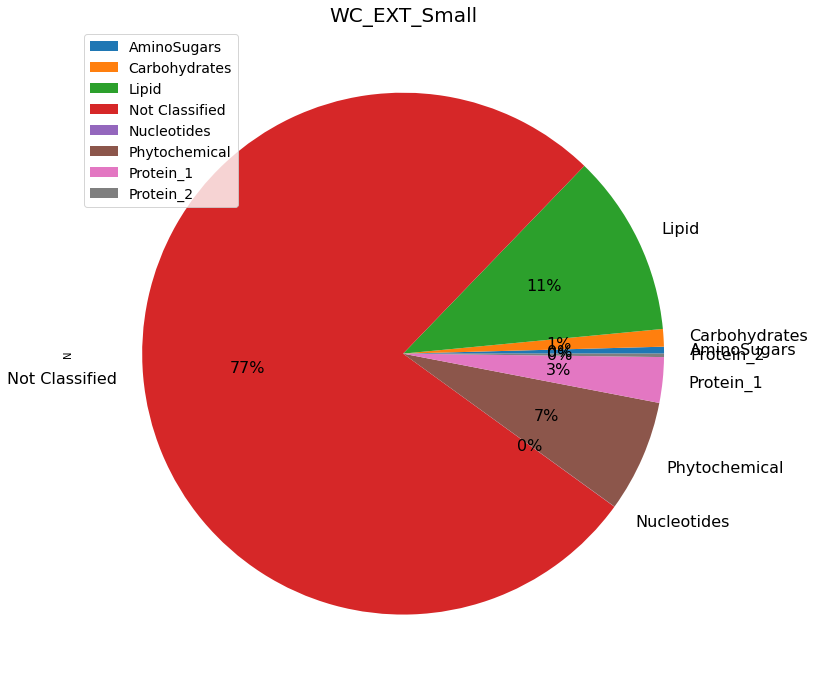

In [59]:
pie = pd.DataFrame({'Name': ['Lipid', 'Protein_1', 'Protein_2', 'AminoSugars','Carbohydrates', 'Nucleotides','Phytochemical', 'Not Classified'],
                    'N': [N_Lipid, N_Protein_1, N_Protein_2, N_AminoSugars,N_Carbohydrates, N_Nucleotides, N_Phytochemical, N_Not_Classified]})
plt.figure(figsize=(12,12))
pie.groupby(['Name']).sum().plot(kind='pie', y ='N', autopct='%1.0f%%',figsize=(12,12), fontsize = 16)
plt.legend(loc = 2, fontsize = 14)
plt.title('WC_EXT_Small',fontsize = 20)

Text(0.5, 1.0, 'WC_EXT_Small')

<Figure size 864x864 with 0 Axes>

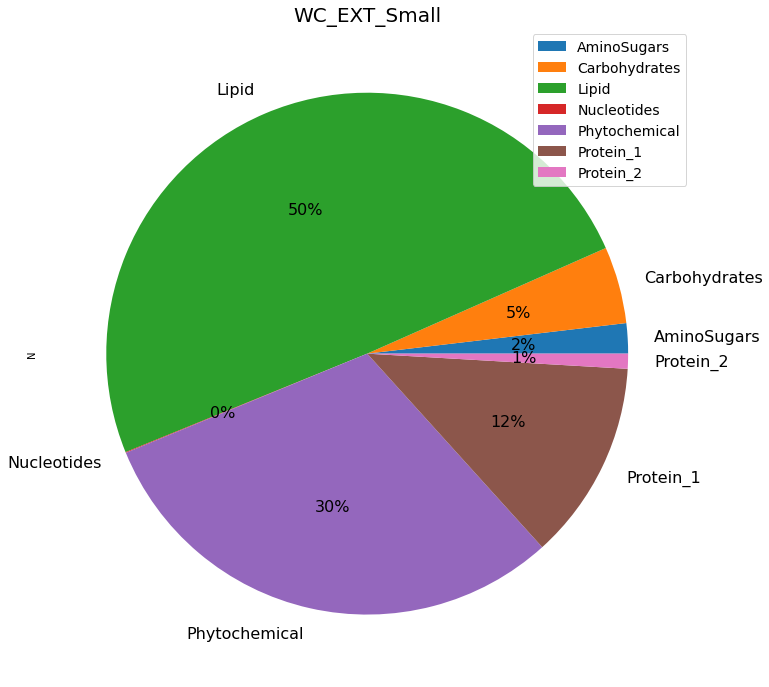

In [60]:
pie_only_IDd = pd.DataFrame({'Name': ['Lipid', 'Protein_1', 'Protein_2', 'AminoSugars', 'Carbohydrates', 'Nucleotides','Phytochemical'],
                    'N': [N_Lipid, N_Protein_1, N_Protein_2, N_AminoSugars,N_Carbohydrates, N_Nucleotides, N_Phytochemical]})
plt.figure(figsize=(12,12))
pie_only_IDd.groupby(['Name']).sum().plot(kind='pie', y ='N', autopct='%1.0f%%',figsize=(12,12), fontsize = 16)
plt.legend(loc = 1, fontsize = 14)
plt.title('WC_EXT_Small',fontsize = 20)